In [5]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# S&P500のデータを取得
ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")

# 特徴量とターゲットの設定
data['Date'] = data.index
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)
X = data[['Date']]
y = data['Close']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの作成と訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 95422.8930185235


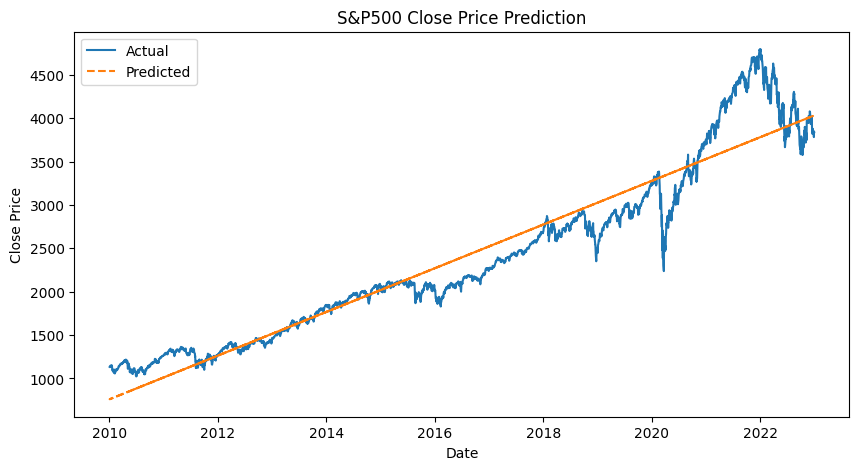

In [7]:
# 予測結果の表示
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P500 Close Price Prediction')
plt.legend()
plt.show()